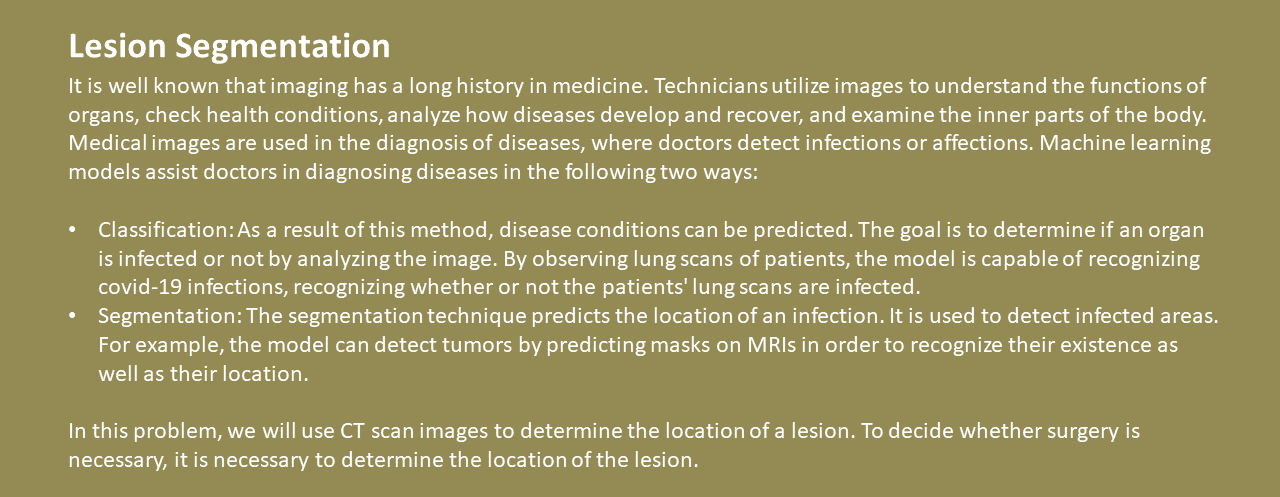

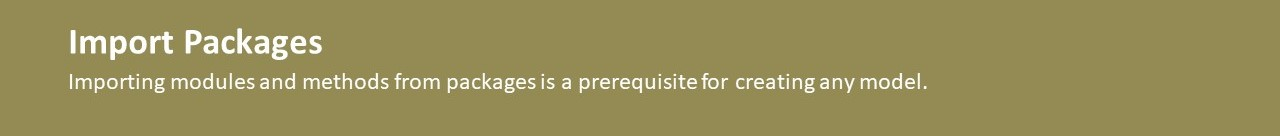

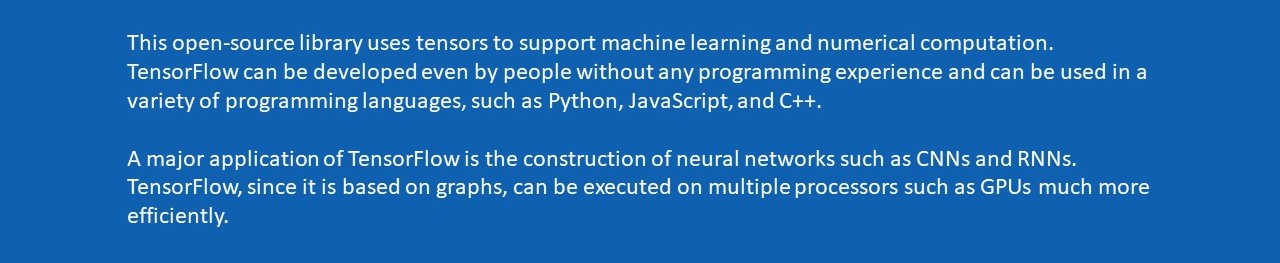

In [1]:
import tensorflow as tf

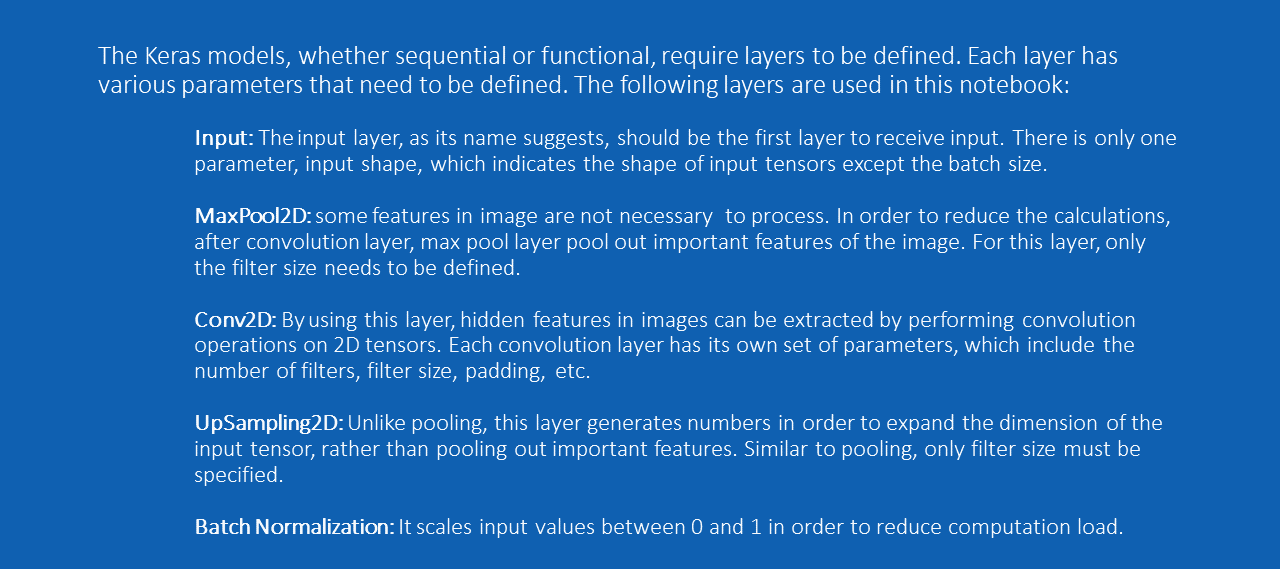

In [2]:
from tensorflow.keras.layers import Conv2D, Input, UpSampling2D, BatchNormalization, MaxPool2D

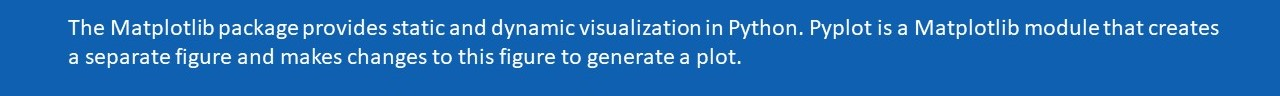

In [3]:
import matplotlib.pyplot as plt

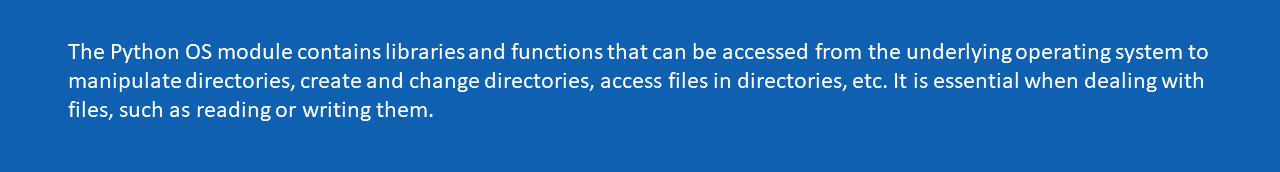

In [4]:
import os

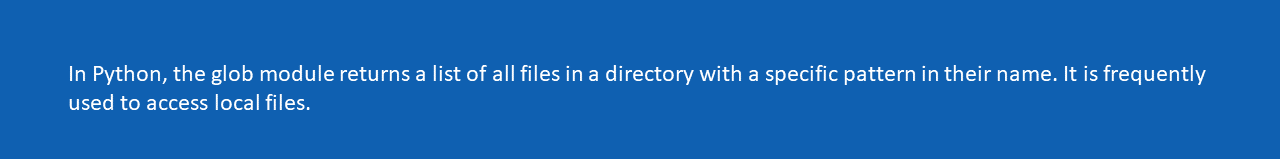

In [5]:
import glob

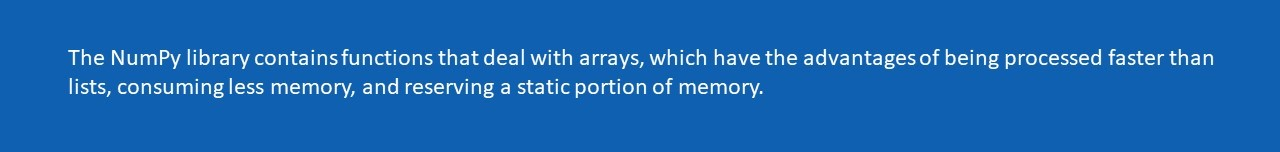

In [6]:
import numpy as np

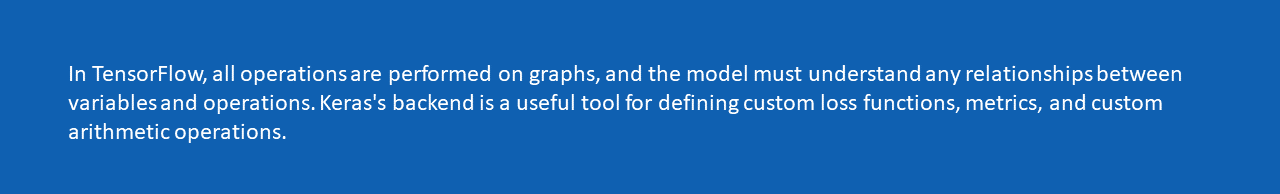

In [7]:
from tensorflow.keras import backend as K

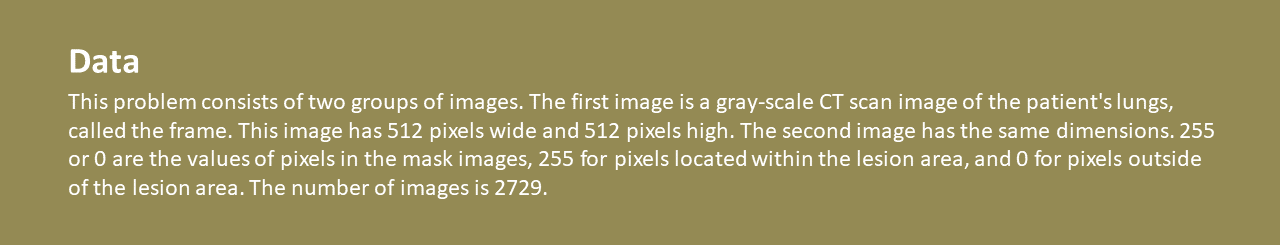

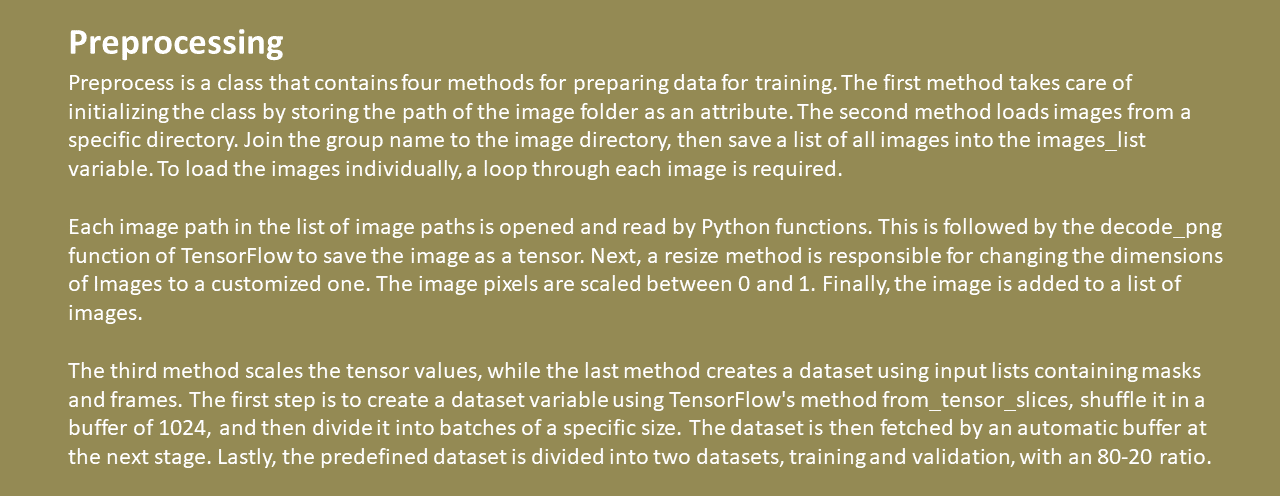

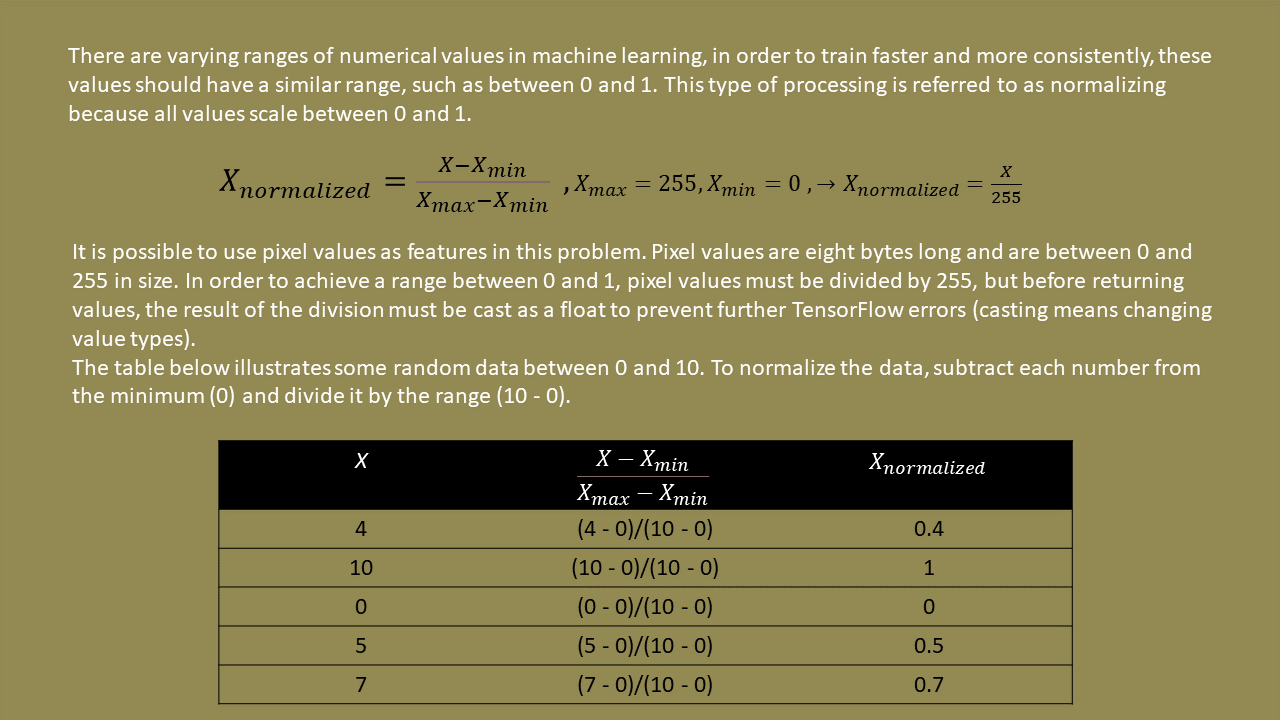

In [8]:
class Preprocess():
  def __init__(self, images_path):
    self.dir = images_path

  def load_images(self, subfolder, dim=512, mask=True):
    images_path = os.path.join(self.dir, subfolder+'/*')
    images_list = glob.glob(images_path)
    images = []

    for image_path in images_list: 
      image_file = open(image_path, 'rb')
      image = image_file.read()
      tf_image = tf.io.decode_png(image, channels=1)
      tf_image = tf.image.resize(tf_image, [dim, dim])
      tf_image_p = tf.cast(self.__scale__(tf_image), dtype=tf.float16)
      images.append(tf_image_p)
    
    return images
  
  def __scale__(self, image, ratio=255):
    image = tf.divide(image, ratio)
    return image
  
  def load_dataset(self, images, targets, batch_size=16):

    dataset = tf.data.Dataset.from_tensor_slices((images, targets)).shuffle(1024).batch(batch_size)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    train_size = int(0.8*2728/batch_size)
    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size)
    
    return train_dataset, val_dataset

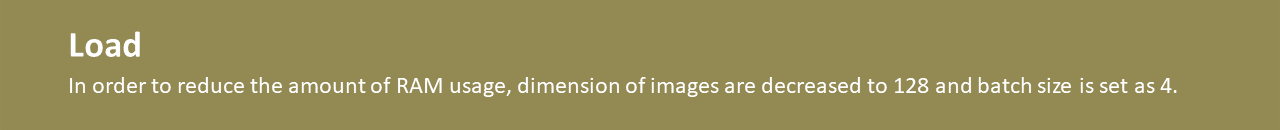

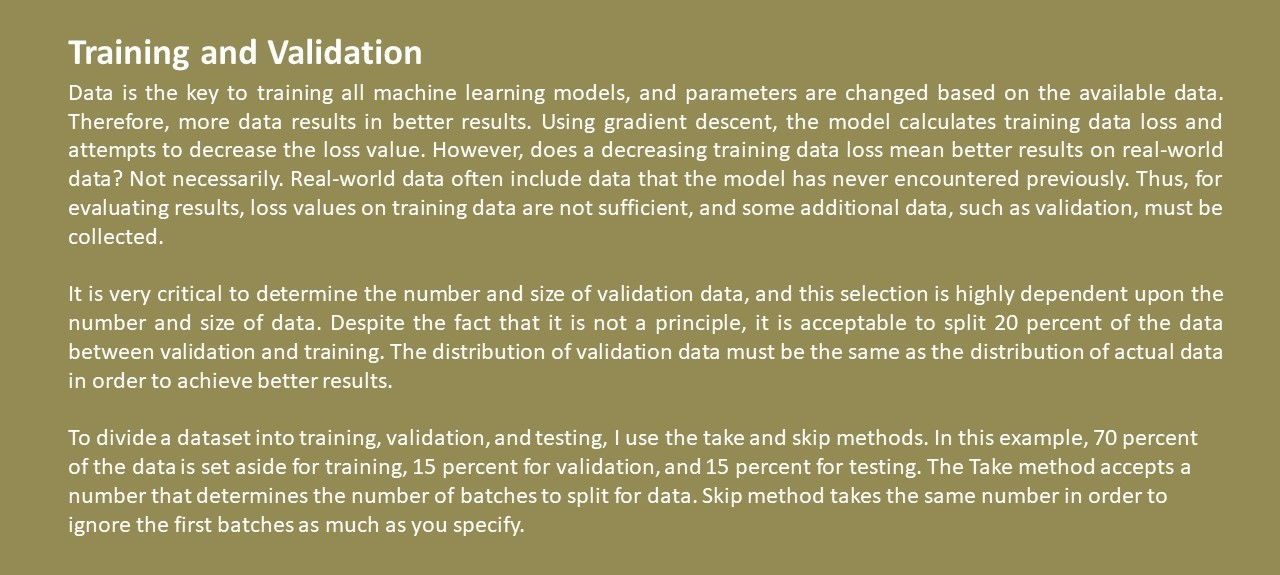

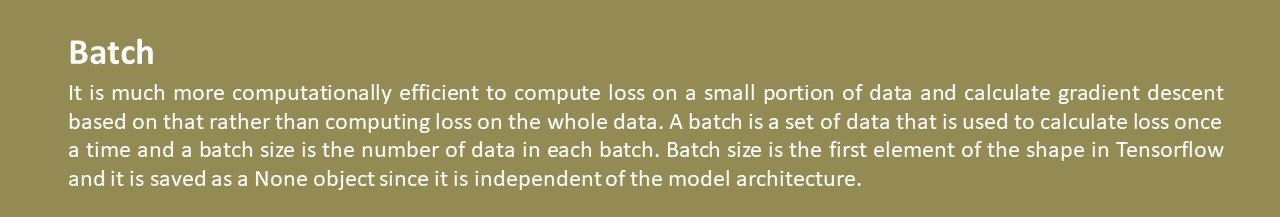

In [9]:
prep = Preprocess('/content/drive/MyDrive/Documents/AI book/Chapter 6/Chapter 6 Data')
dimension = 128
batch_size = 4
train_data, val_data = prep.load_dataset(prep.load_images('frames', dim=dimension)[:2728], prep.load_images('masks', dim=dimension)[:2728], batch_size=batch_size)
train_data

<TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float16, name=None), TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float16, name=None))>

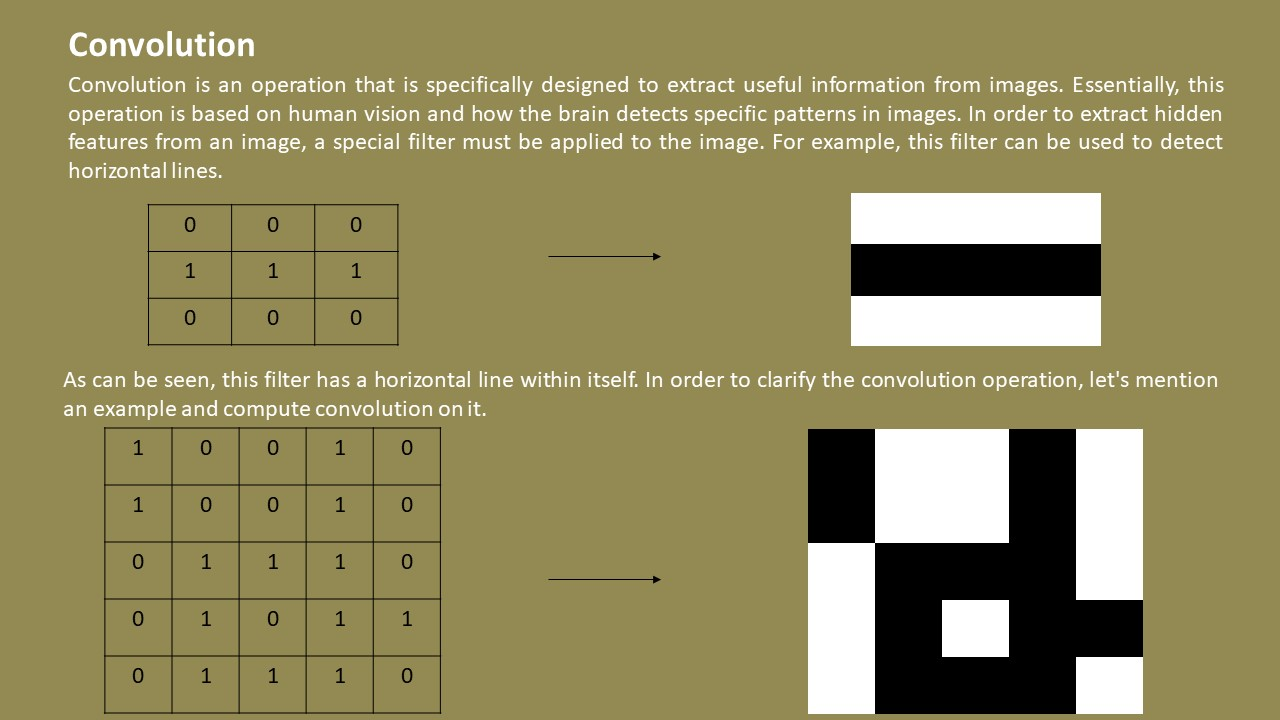

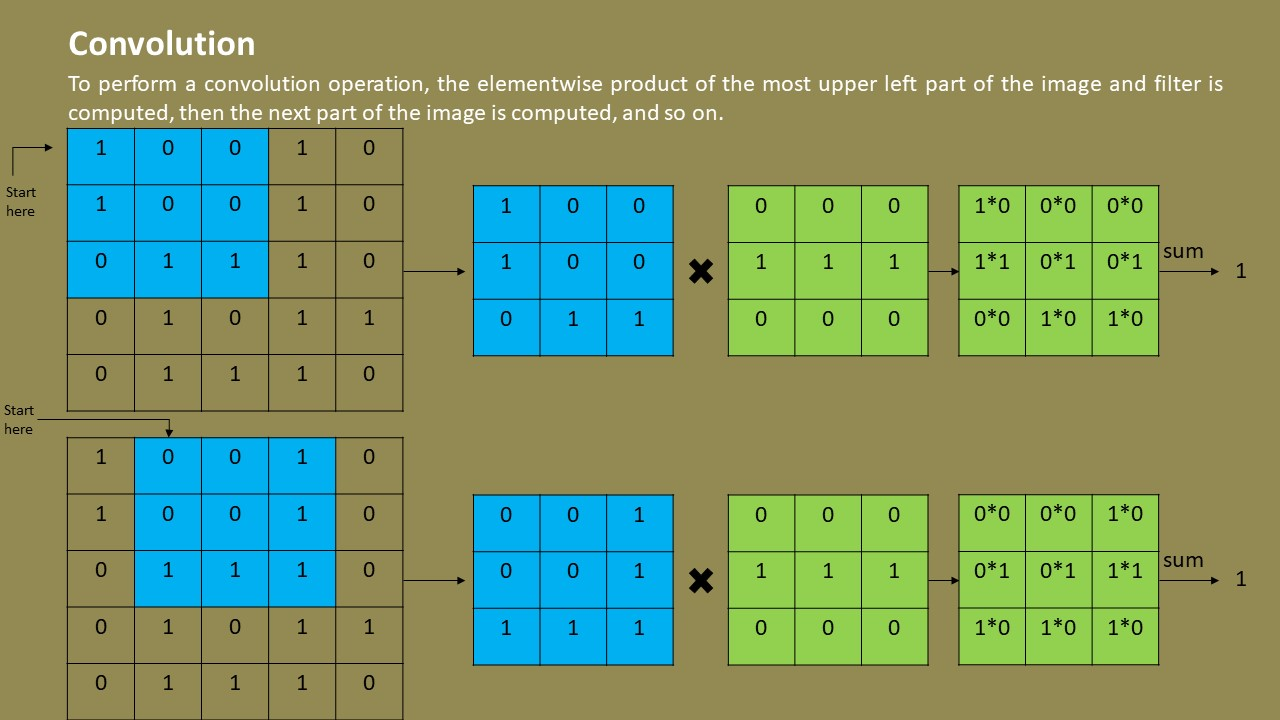

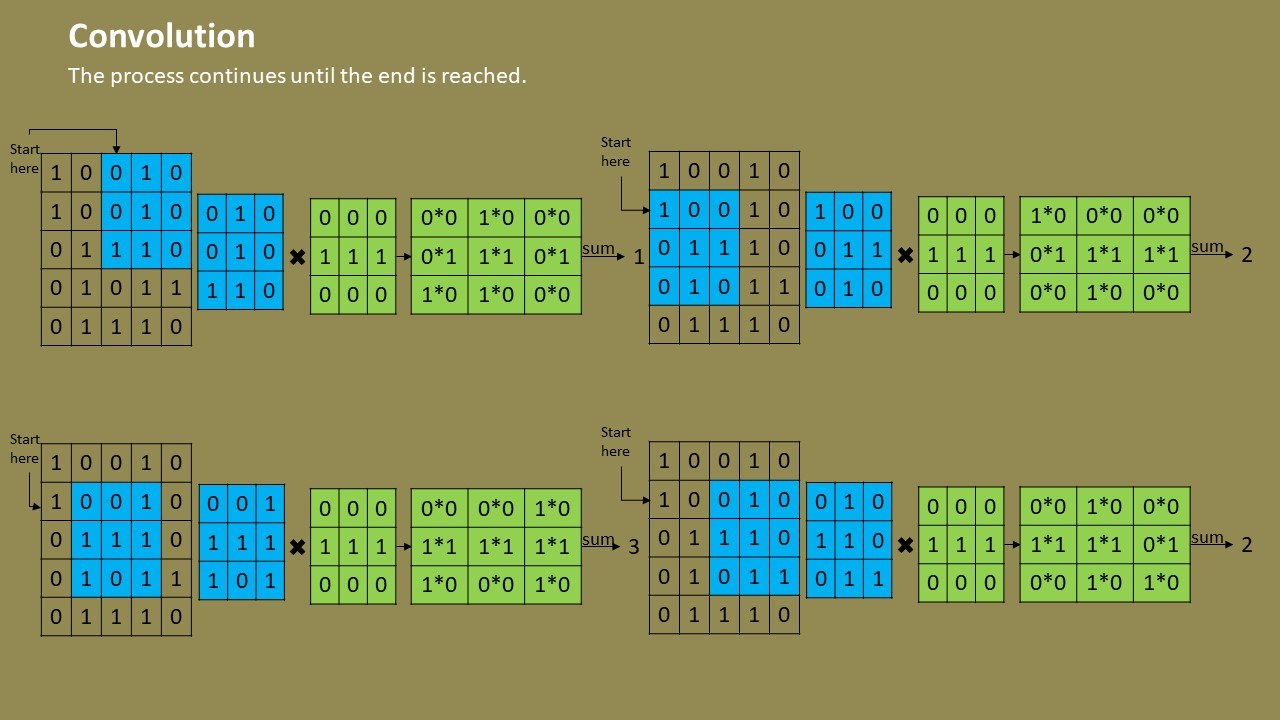

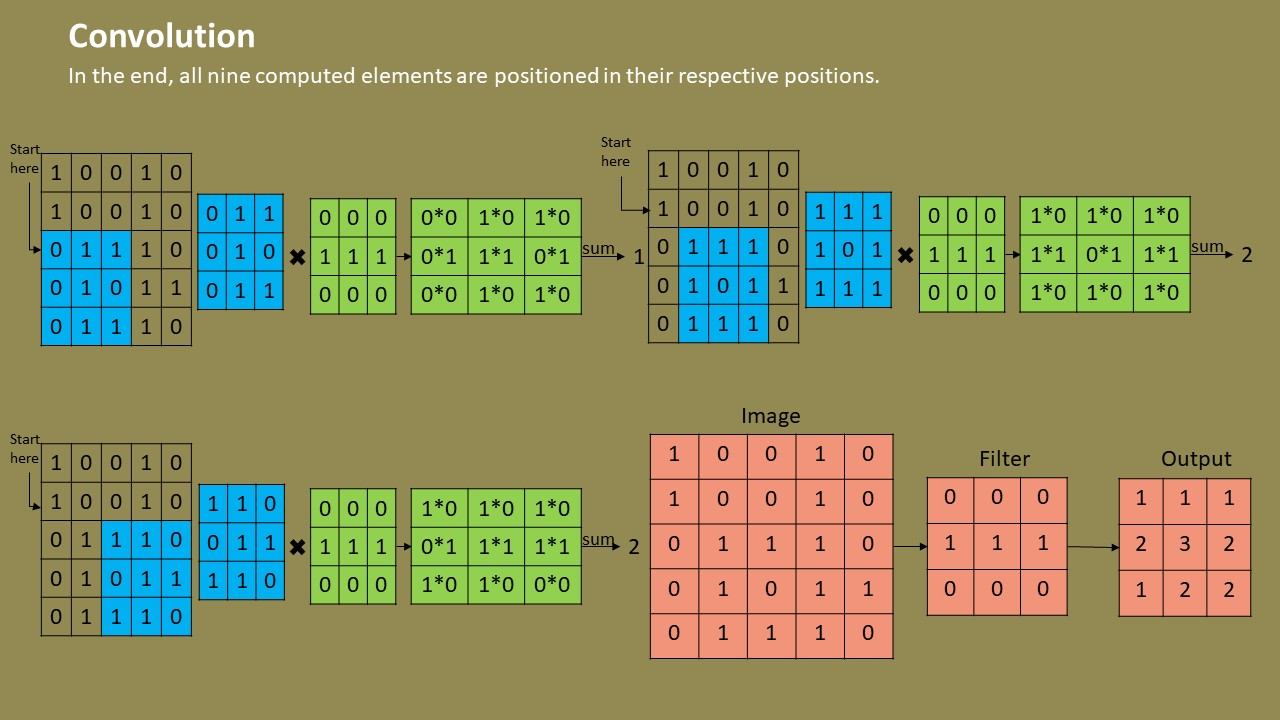

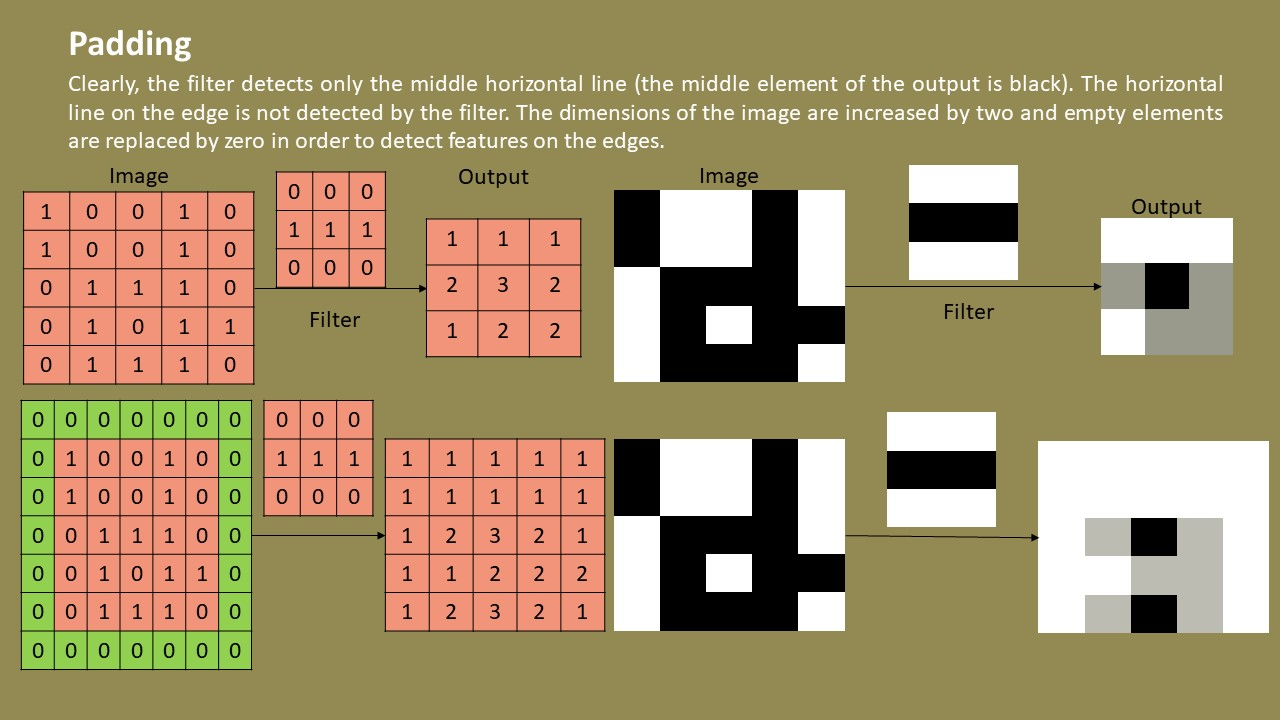

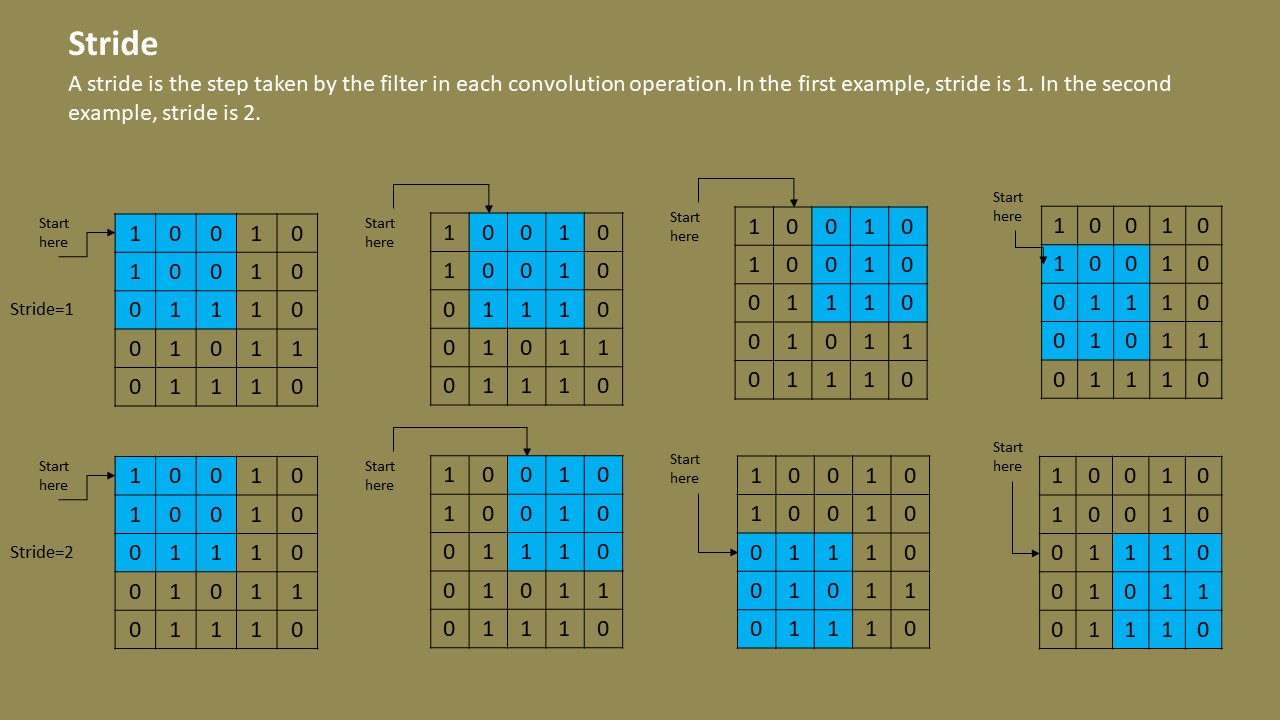

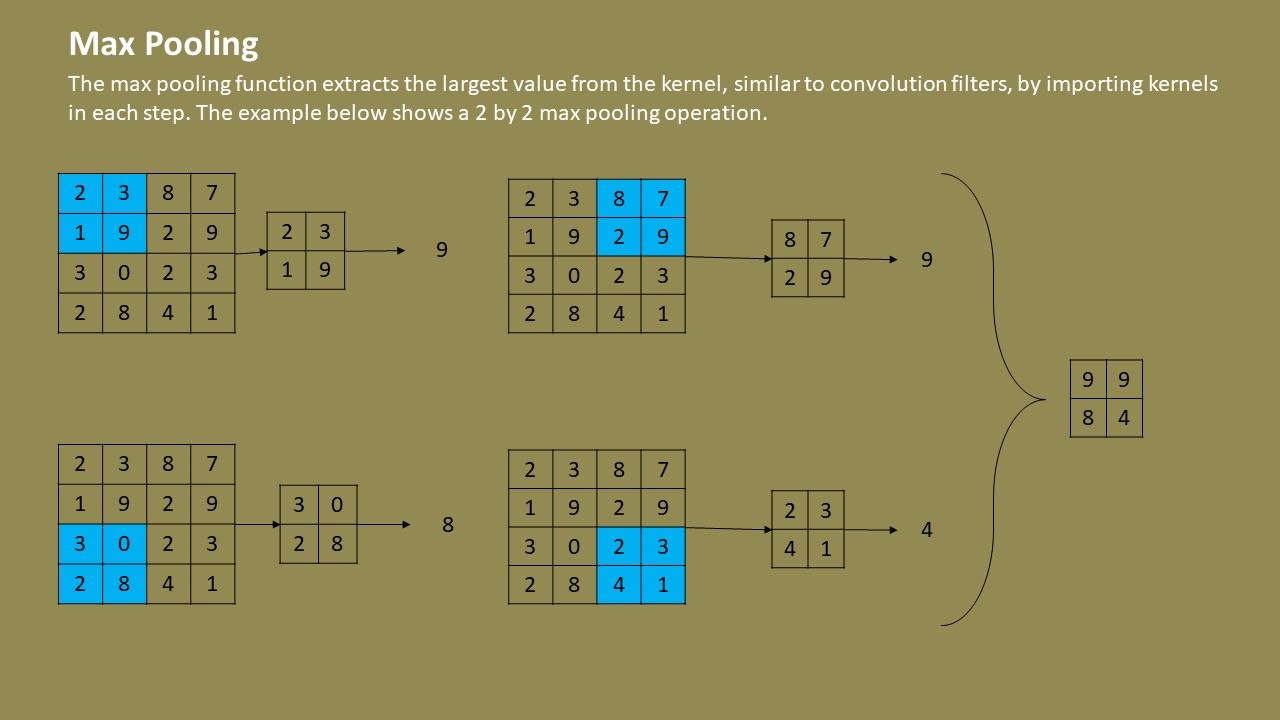

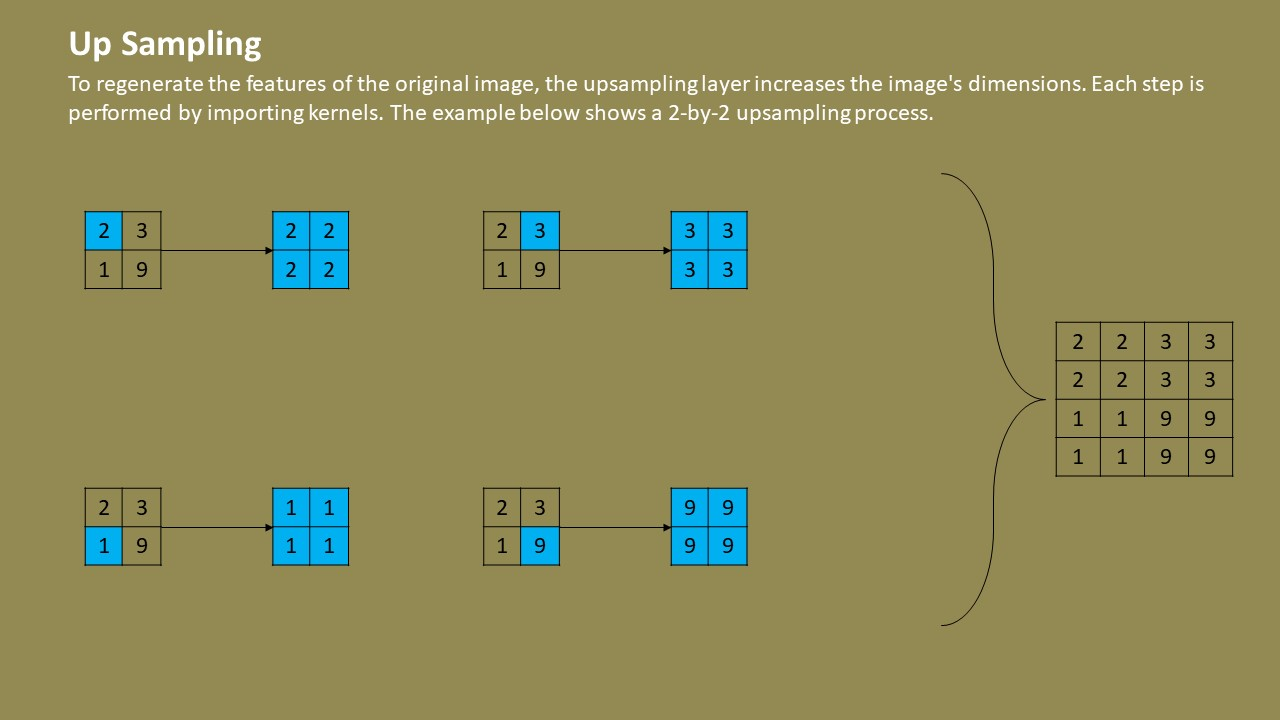

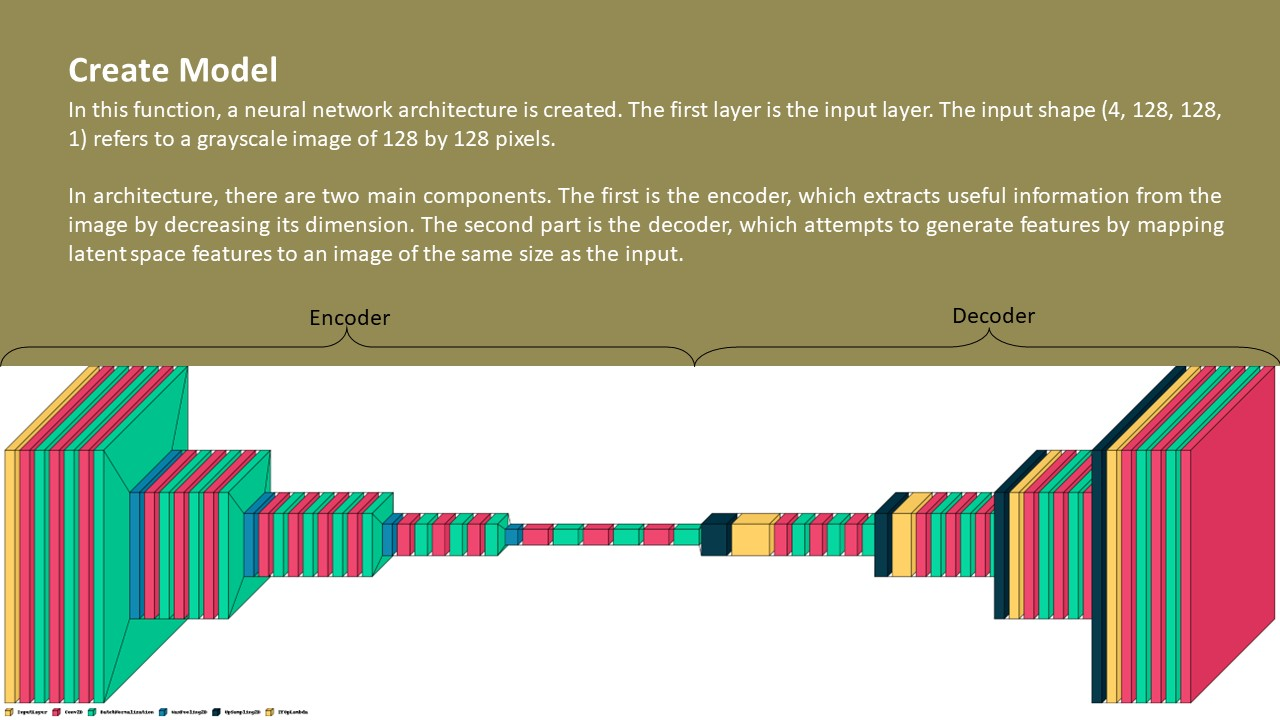

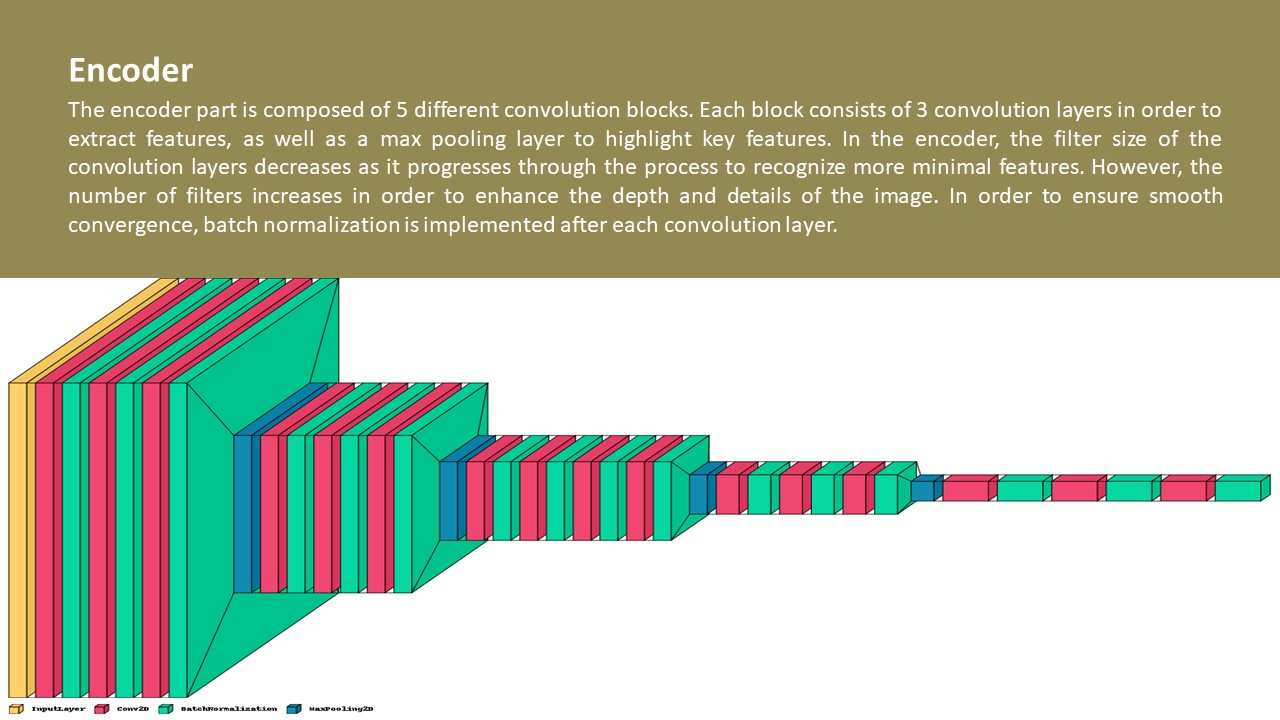

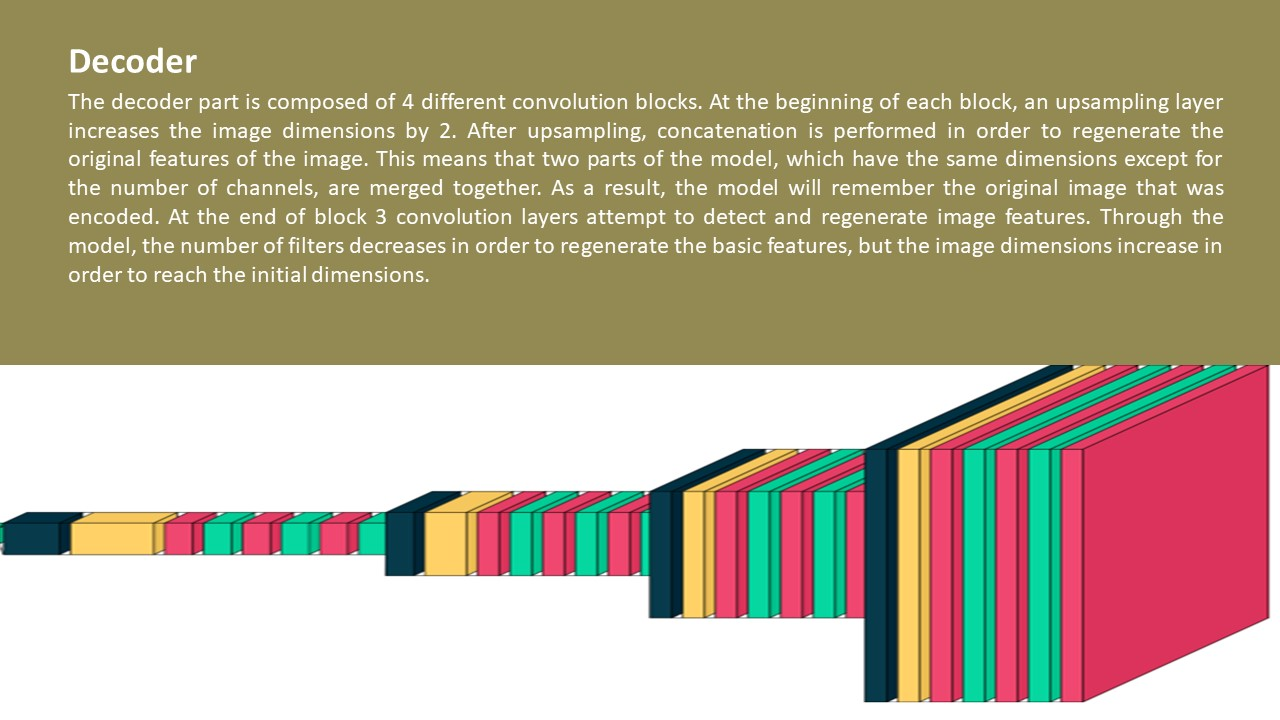

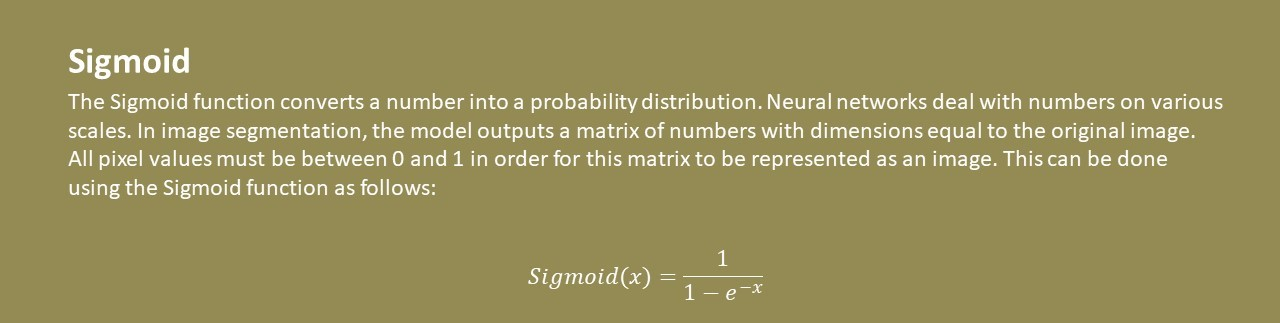

In [10]:
def neural_net(input_shape=(128, 128, 1), batch_size=4):

  inputs = Input(shape=input_shape, batch_size=batch_size)
  x = Conv2D(32, (3, 3), 1, activation='relu', padding='same')(inputs)
  x = BatchNormalization()(x)
 
  x = Conv2D(32, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(32, (3, 3), 1, activation='relu', padding='same')(x)
  x1 = BatchNormalization()(x)
  x = MaxPool2D((2, 2))(x1)
 
  x = Conv2D(64, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)

  x = Conv2D(64, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(64, (3, 3), 1, activation='relu', padding='same')(x)
  x2 = BatchNormalization()(x)
  x = MaxPool2D((2, 2))(x2)
 
  x = Conv2D(128, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(128, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)

  x = Conv2D(128, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(128, (3, 3), 1, activation='relu', padding='same')(x)
  x3 = BatchNormalization()(x)
  x = MaxPool2D((2, 2))(x3)
 
  x = Conv2D(256, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(256, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)

  x = Conv2D(256, (3, 3), 1, activation='relu', padding='same')(x)
  x4 = BatchNormalization()(x)
  x = MaxPool2D((2, 2))(x4)
 
  x = Conv2D(512, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(512, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(512, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = UpSampling2D((2, 2))(x)
  x = tf.concat([x4, x], axis=-1)

  x = Conv2D(256, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(256, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(256, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = UpSampling2D((2, 2))(x)
  x = tf.concat([x3, x], axis=-1)
  
  x = Conv2D(128, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(128, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(128, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = UpSampling2D((2, 2))(x)
  x = tf.concat([x2, x], axis=-1)

  x = Conv2D(64, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(64, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(64, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = UpSampling2D((2, 2))(x)
  x = tf.concat([x1, x], axis=-1)

  x = Conv2D(32, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(32, (3, 3), 1, activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
 
  x = Conv2D(1, (3, 3), 1, activation='sigmoid', padding='same')(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

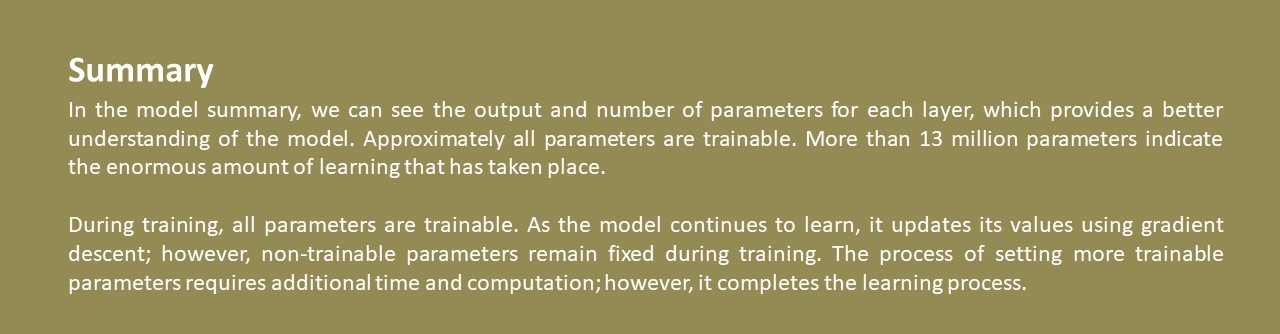

In [11]:
model = neural_net(input_shape=(dimension, dimension, 1), batch_size=batch_size)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(4, 128, 128, 1)]   0           []                               
                                                                                                  
 conv2d (Conv2D)                (4, 128, 128, 32)    320         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (4, 128, 128, 32)   128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 conv2d_1 (Conv2D)              (4, 128, 128, 32)    9248        ['batch_normalization[0][0]']

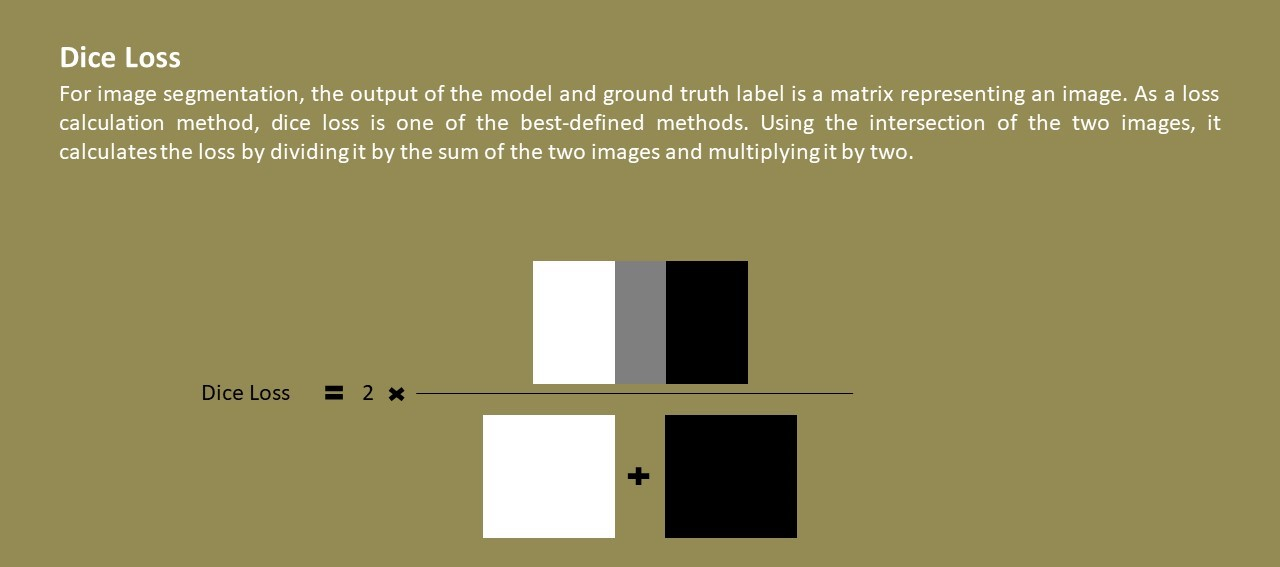

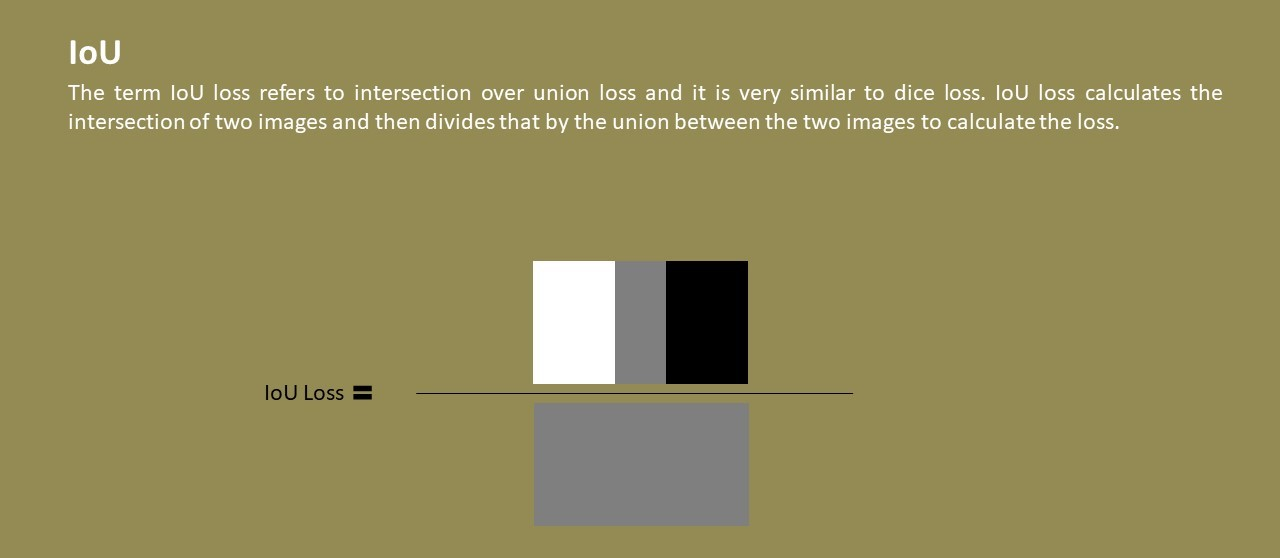

In [12]:
def iou_loss(y_true, y_pred):
    return 1-iou(y_true, y_pred)

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def iou(y_true, y_pred):
    intersection = K.sum(K.abs(y_true * y_pred))
    sum_ = K.sum((y_true)) + K.sum((y_pred))
    jac = (intersection) / (sum_ - intersection)
    return jac

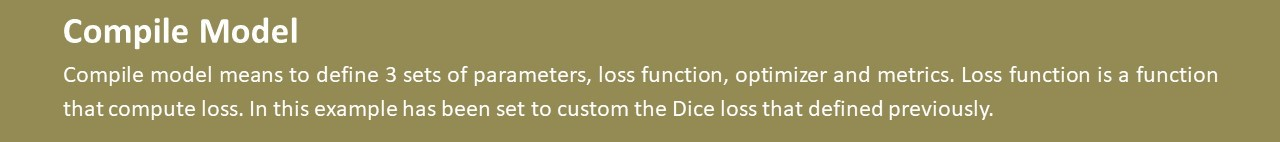

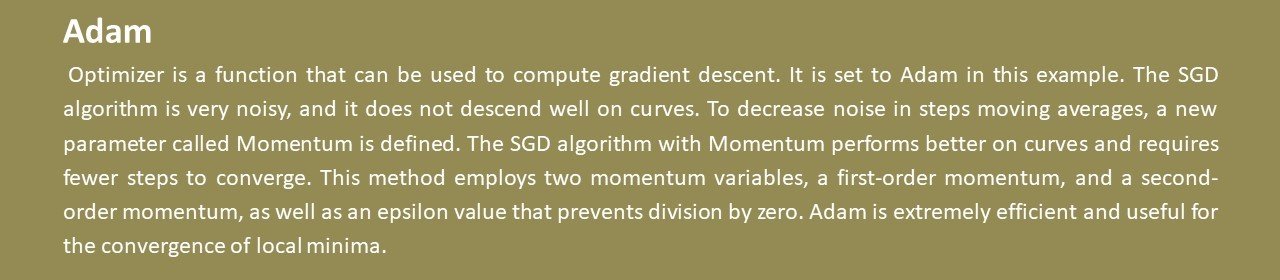

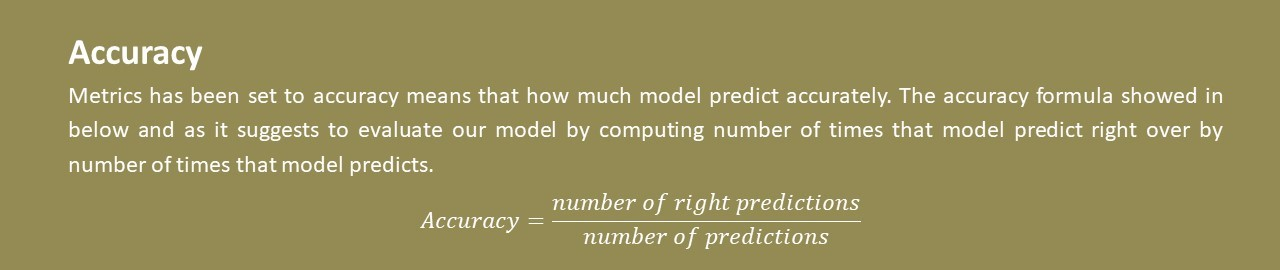

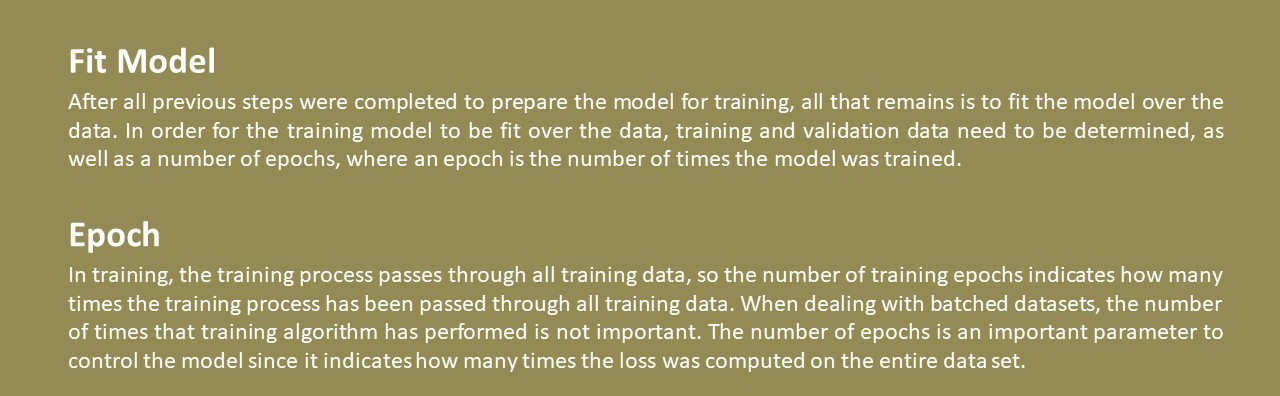

In [13]:
model.compile(loss=dice_coef_loss, optimizer=tf.keras.optimizers.Adam(lr=0.00001), metrics=['binary_accuracy', iou_loss])
history = model.fit(train_data, validation_data=val_data, epochs=100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
545/545 [==============================] - 38s 48ms/step - loss: -0.0534 - binary_accuracy: 0.6168 - iou_loss: 0.9721 - val_loss: -0.0790 - val_binary_accuracy: 0.7226 - val_iou_loss: 0.9582
Epoch 2/100
545/545 [==============================] - 26s 47ms/step - loss: -0.0827 - binary_accuracy: 0.7731 - iou_loss: 0.9560 - val_loss: -0.0811 - val_binary_accuracy: 0.7678 - val_iou_loss: 0.9569
Epoch 3/100
545/545 [==============================] - 26s 48ms/step - loss: -0.0960 - binary_accuracy: 0.8081 - iou_loss: 0.9484 - val_loss: -0.1089 - val_binary_accuracy: 0.8092 - val_iou_loss: 0.9411
Epoch 4/100
545/545 [==============================] - 26s 47ms/step - loss: -0.1040 - binary_accuracy: 0.8311 - iou_loss: 0.9438 - val_loss: -0.1140 - val_binary_accuracy: 0.8335 - val_iou_loss: 0.9381
Epoch 5/100
545/545 [==============================] - 26s 47ms/step - loss: -0.1114 - binary_accuracy: 0.8461 - iou_loss: 0.9395 - val_loss: -0.1102 - val_binary_accuracy: 0.8585 - val_io

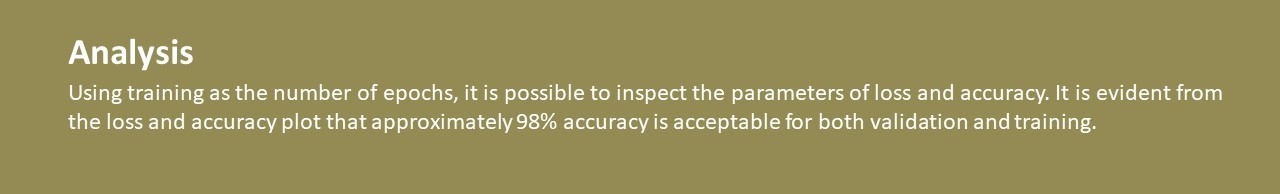

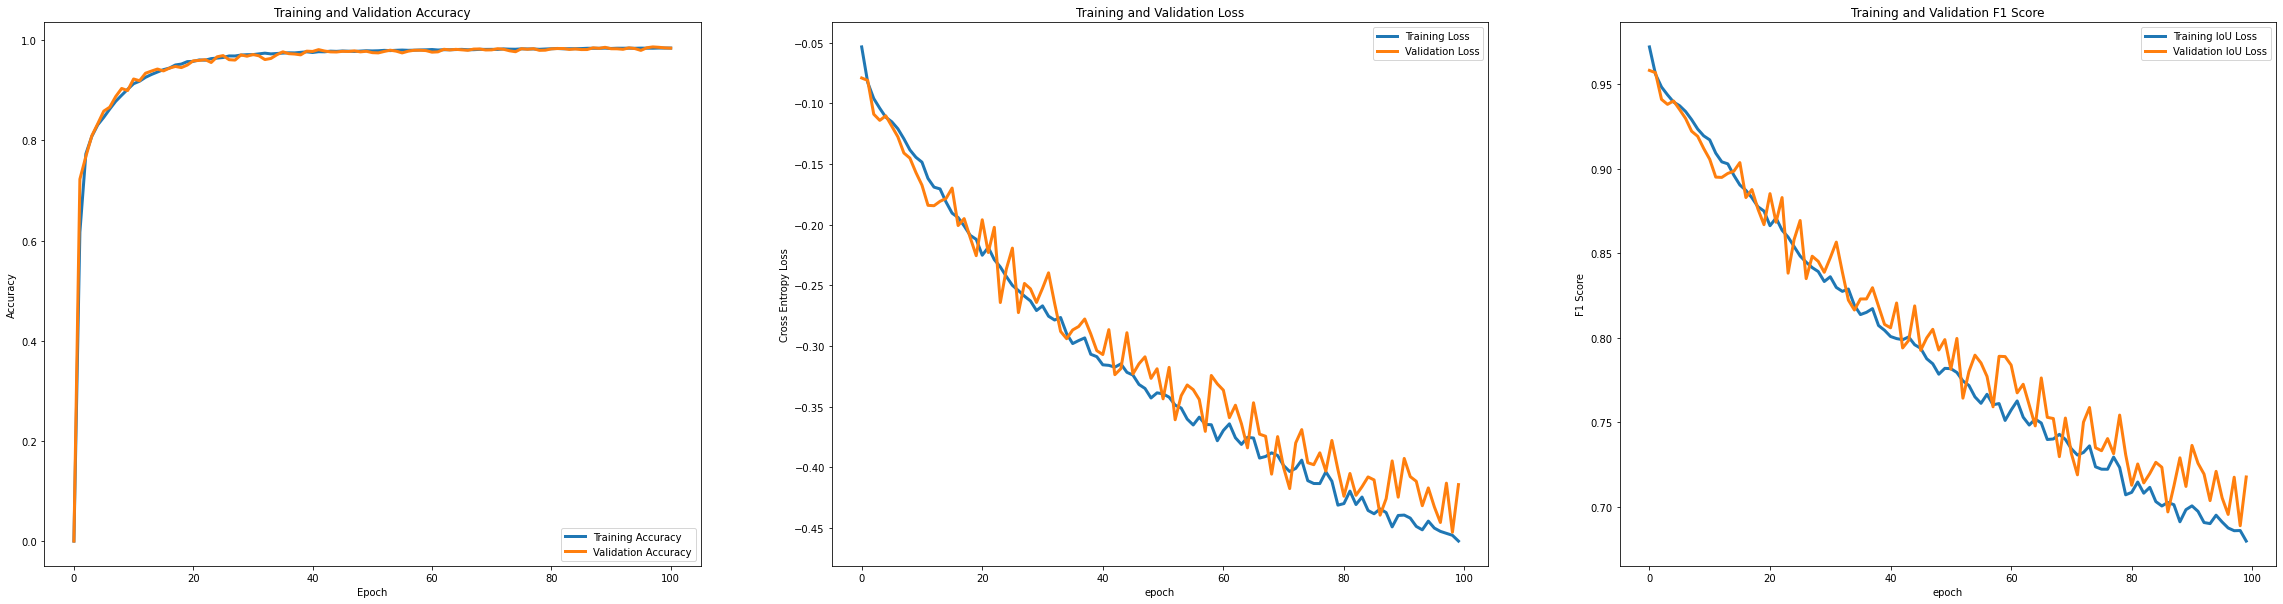

In [15]:
acc = [0.] + history.history['binary_accuracy']             #load training accuracy of the model   
val_acc = [0.] + history.history['val_binary_accuracy']     #load validation accuarcy of the model
loss = history.history['loss']                                #load training loss of the model
val_loss = history.history['val_loss']                          #load validation loss of the model
f1_s =  history.history['iou_loss']
val_f1_s = history.history['val_iou_loss']
fig = plt.figure(figsize=(40, 10))
plt.subplot(1, 3, 1)                                          #plot accuarcy vs epochs
plt.plot(acc, label='Training Accuracy', linewidth=3)
plt.plot(val_acc, label='Validation Accuracy', linewidth=3)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 3, 2)                                         #plot loss vs epochs
plt.plot(loss, label='Training Loss', linewidth=3)
plt.plot(val_loss, label='Validation Loss', linewidth=3)
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy Loss')
plt.xlabel("epoch")
plt.title('Training and Validation Loss')
plt.subplot(1, 3, 3)                                         #plot loss vs epochs
plt.plot(f1_s, label='Training IoU Loss', linewidth=3)
plt.plot(val_f1_s, label='Validation IoU Loss', linewidth=3)
plt.legend(loc='upper right')
plt.ylabel('F1 Score')
plt.xlabel("epoch")
plt.title('Training and Validation F1 Score')
plt.show()

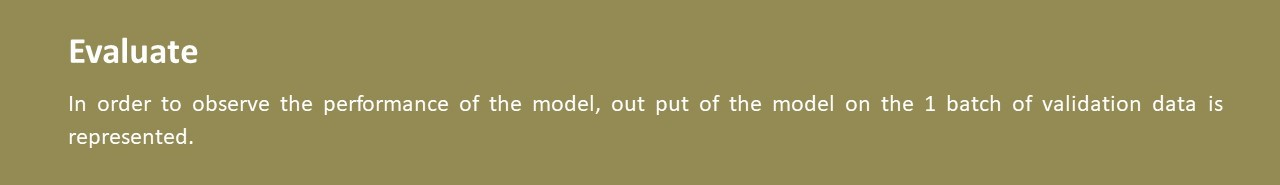

1/1 [==============================] - 0s 18ms/step


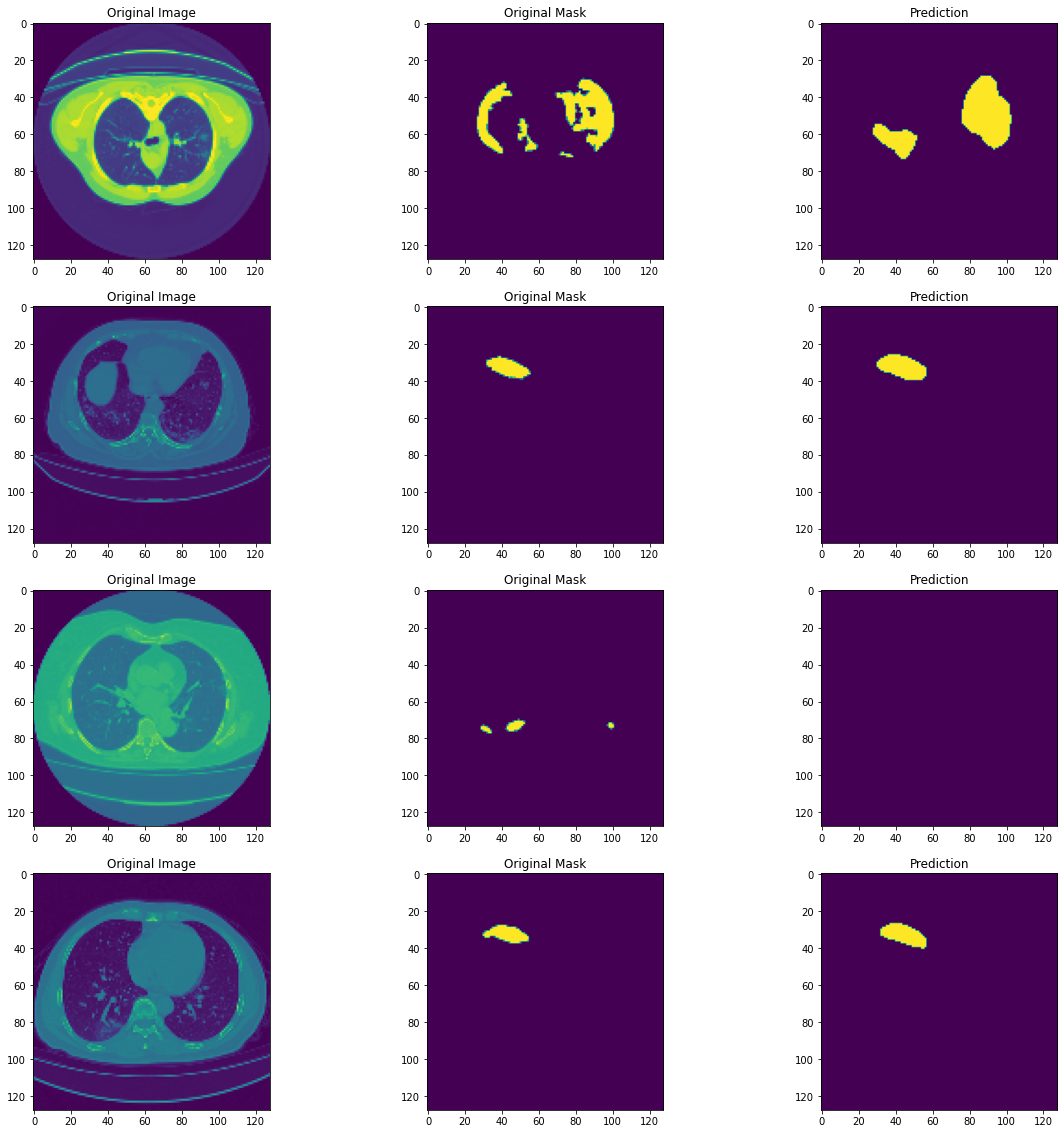

In [19]:
plt.figure(figsize=(20, 20))
i = 0
for data in val_data.take(1):
    for image, mask in zip(data[0], data[1]):
      pred = model.predict(np.expand_dims(image, axis=0), batch_size=1)
      image = np.squeeze(np.array(image, dtype=np.float32))
      mask = np.squeeze(np.array(mask, dtype=np.float32))
      pred = np.squeeze(np.array(np.squeeze(pred, axis=0), dtype=np.int32))
      plt.subplot(batch_size, 3, 3*i+1)
      plt.imshow(image, vmin=0, vmax=1)
      plt.title('Original Image')
      plt.subplot(batch_size, 3, 3*i+2)
      plt.imshow(mask, vmin=0, vmax=1)
      plt.title('Original Mask')
      plt.subplot(batch_size, 3, 3*i+3)
      plt.imshow(pred, vmin=0, vmax=1)
      plt.title('Prediction')
      i += 1 
plt.show()